## Week 5&6 - Exercise 3.2
Name: Madhukar Ayachit

Date: 10 Jan 2022

Class: DSC-640

Assignment: tree maps, area charts, and stacked area charts 


In [1]:
#Load in libraries
## import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import squarify                  # pip install squarify (algorithm for treemap)

In [ ]:
#pip install squarify 

In [2]:
## read the data from excel file into a dataframe
df_uEmp = pd.read_csv('Data/ex3-3/unemployement-rate-1948-2010.csv')

In [3]:
## display dataframe
df_uEmp

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0
743,LNS14000000,2009,M12,10.0
744,LNS14000000,2010,M01,9.7


In [4]:
## read the data from excel file into a dataframe
df_Exp = pd.read_csv('Data/ex3-3/expenditures.txt', sep='\t')

In [5]:
## display dataframe
df_Exp

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
...,...,...,...,...
345,1984,Education,303,1
346,1984,Tobacco Products,228,1
347,1984,Miscellaneous,451,1
348,1984,Cash Contributions,706,1


## Tree map Chart

In [6]:
## Create subset data frame for Tree Map

df_2008 = df_Exp[df_Exp.year == 2008]

In [7]:
## display newly created subset dataframe

df_2008

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
5,2008,Healthcare,2976,1
6,2008,Entertainment,2835,1
7,2008,Personal Care,616,1
8,2008,Reading,116,1
9,2008,Education,1046,1


In [8]:
## Select colors from matplotlib - for plotting the Treemap

norm = matplotlib.colors.Normalize(vmin=min(df_2008.expenditure), vmax=max(df_2008.expenditure))
colors = [matplotlib.cm.Oranges(norm(value)) for value in df_2008.expenditure]

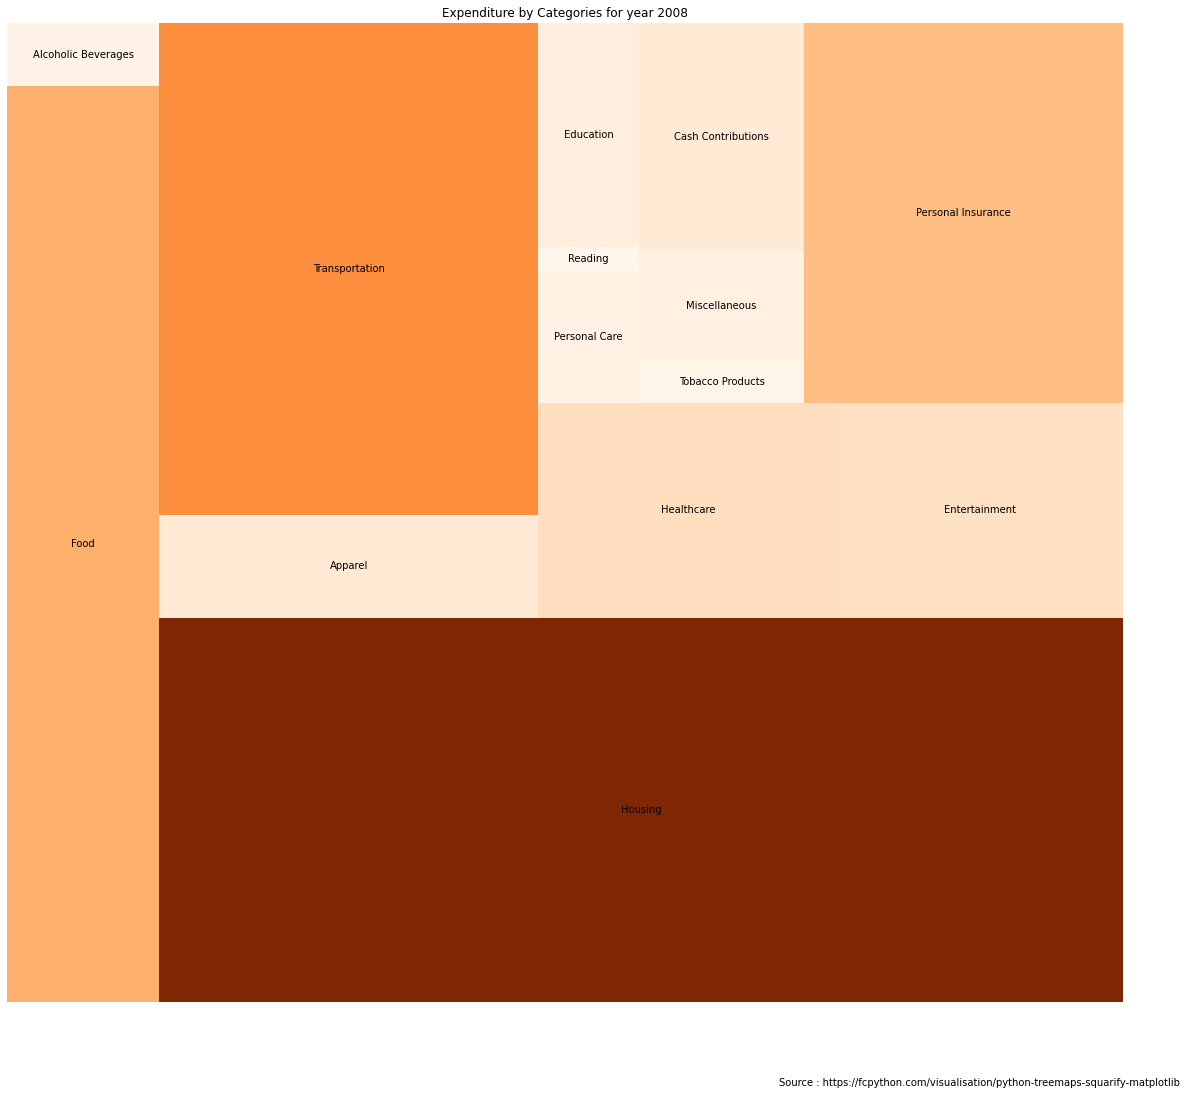

In [9]:
fig = plt.figure(figsize=(20,18))
squarify.plot(sizes=df_2008['expenditure'], label=df_2008['category'], color=colors)
#squarify.plot(sizes=df_2002['expenditure'], label=df_2002['category'],  color=colors, pad = True)
fig.text(0.8, 0.06,
         "Source : https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib",
         fontsize=10,
         ha="center", wrap="True")
plt.title('Expenditure by Categories for year 2008')
plt.axis('off')
plt.show()

## Area Chart

In [13]:
## create subset with Year 2008 data from unemployment dataset and display the dataframe

df1_2008 = df_uEmp[df_uEmp.Year == 2008]
df1_2008

,Series id,Year,Period,Value
720,LNS14000000,2008,M01,5.0
721,LNS14000000,2008,M02,4.8
722,LNS14000000,2008,M03,5.1
723,LNS14000000,2008,M04,5.0
724,LNS14000000,2008,M05,5.4
725,LNS14000000,2008,M06,5.5
726,LNS14000000,2008,M07,5.8
727,LNS14000000,2008,M08,6.1
728,LNS14000000,2008,M09,6.2
729,LNS14000000,2008,M10,6.6


In [14]:
## assign the column data to respectve axis variables
x = df1_2008['Period']
y = df1_2008['Value']

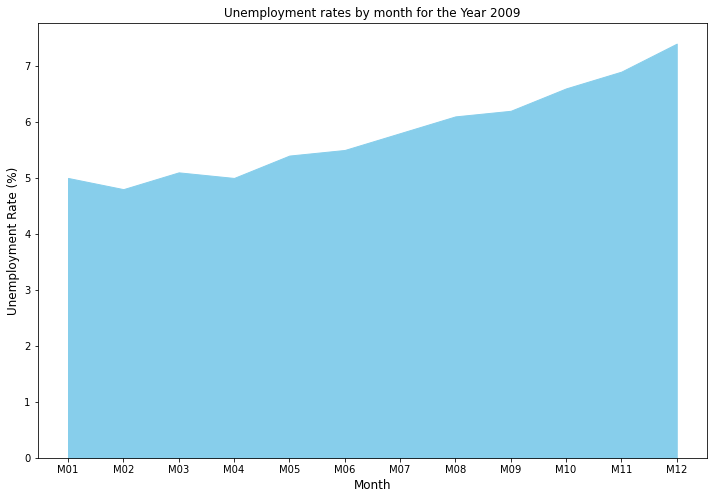

In [15]:
# Area plot
plt.figure(figsize=(12, 8))
plt.fill_between(x, y, color="skyblue")
plt.xlabel('Month', size=12)
plt.ylabel('Unemployment Rate (%)', size=12)
plt.title("Unemployment rates by month for the Year 2009")
plt.ylim(bottom=0)
plt.show()

## Stacked Area Chart

In [16]:
## Stacked Area chart

## Use pivot method in pandas to reshape the original dataframe so that year is treated as index and categories become columns

new_Exp = df_Exp.pivot(index = 'year', columns = 'category', values = 'expenditure')

new_Exp

category,Alcoholic Beverages,Apparel,Cash Contributions,Education,Entertainment,Food,Healthcare,Housing,Miscellaneous,Personal Care,Personal Insurance,Reading,Tobacco Products,Transportation
year,,,,,,,,,,,,,,
1984,275,1319,706,303,1055,3290,1049,6674,451,289,1897,132,228,4304
1985,306,1420,805,321,1170,3477,1108,7087,529,303,2016,141,219,4587
1986,271,1346,746,314,1149,3448,1135,7292,522,303,2127,140,230,4842
1987,289,1446,741,337,1193,3664,1135,7569,562,330,2175,142,232,4600
1988,269,1489,693,342,1329,3748,1298,8079,578,334,2249,150,242,5093
1989,284,1582,900,367,1424,4152,1407,8609,643,366,2472,157,261,5187
1990,293,1618,816,406,1422,4296,1480,8703,842,364,2592,153,274,5120
1991,297,1735,950,447,1472,4271,1554,9252,860,399,2787,163,276,5151
1992,301,1710,958,426,1500,4723,1634,9477,765,387,2750,162,275,5228


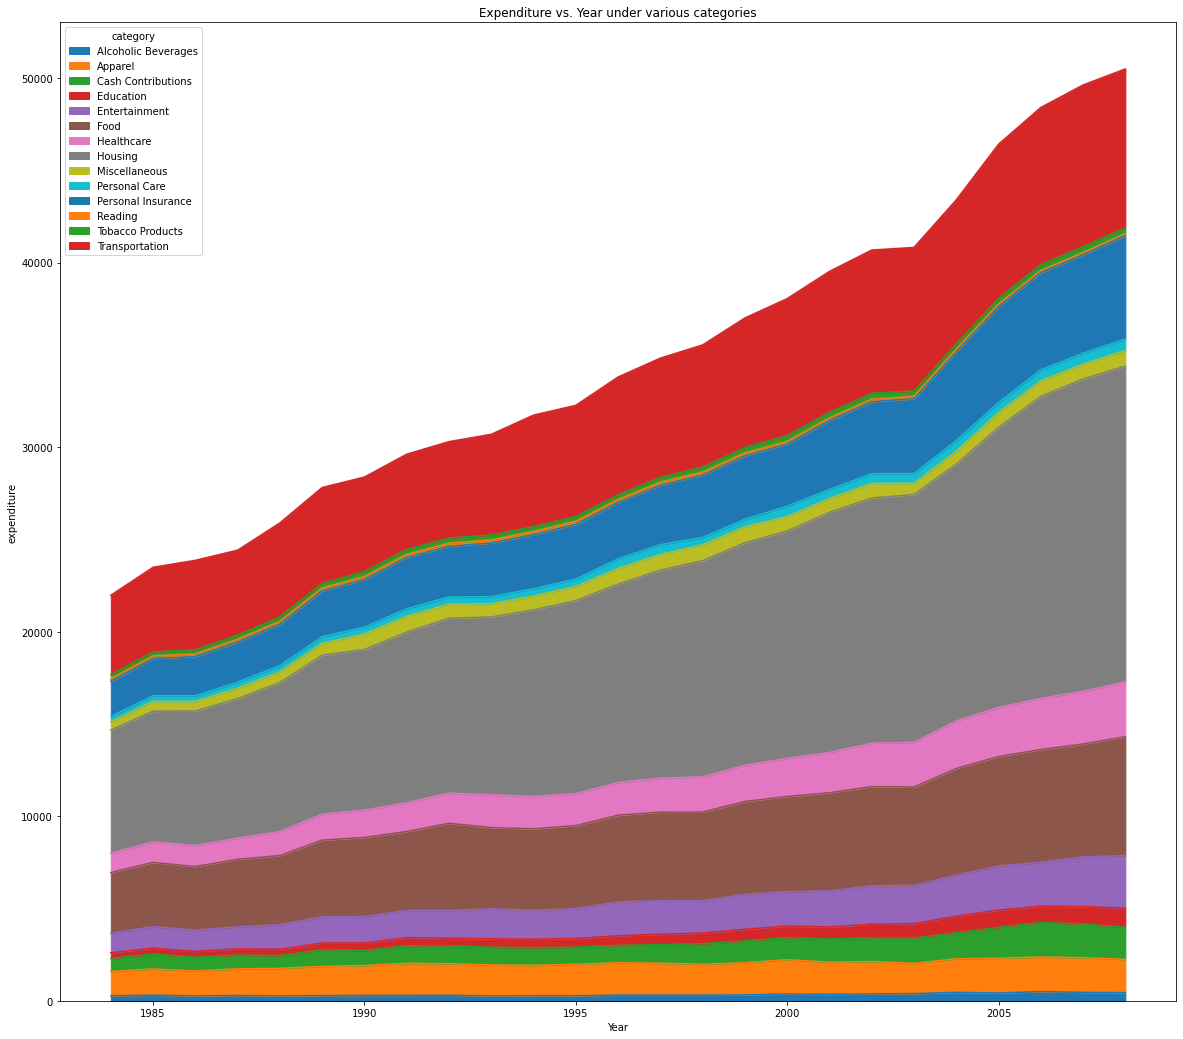

In [18]:
## Stacked Area plot using pandas dataframe

new_Exp.plot.area(figsize=(20,18), title = 'Expenditure by year for various categories')
plt.xlabel("Year")
plt.ylabel("expenditure")
plt.title("Expenditure vs. Year under various categories")
plt.show()